# PCA 範例
* 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [71]:
np.logspace(-4, 1, 26)

array([1.00000000e-04, 1.58489319e-04, 2.51188643e-04, 3.98107171e-04,
       6.30957344e-04, 1.00000000e-03, 1.58489319e-03, 2.51188643e-03,
       3.98107171e-03, 6.30957344e-03, 1.00000000e-02, 1.58489319e-02,
       2.51188643e-02, 3.98107171e-02, 6.30957344e-02, 1.00000000e-01,
       1.58489319e-01, 2.51188643e-01, 3.98107171e-01, 6.30957344e-01,
       1.00000000e+00, 1.58489319e+00, 2.51188643e+00, 3.98107171e+00,
       6.30957344e+00, 1.00000000e+01])

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [72]:
# 執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 1, 26),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.913):
{'logistic__alpha': 0.00015848931924611142, 'pca__n_components': 30}


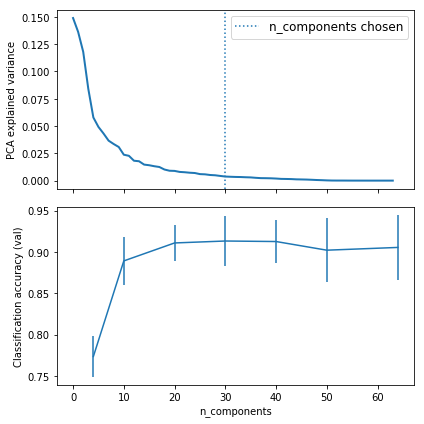

In [73]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# 繪製 7 個不同採樣點的 accuracy
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

In [74]:
best_clfs['mean_test_score']

param_pca__n_components    
4                        70    0.773537
10                       78    0.889189
20                       79    0.910901
30                       10    0.913250
40                       74    0.912625
50                       12    0.902152
64                       13    0.905491
Name: mean_test_score, dtype: float64

In [75]:
best_clfs.index

MultiIndex(levels=[[4, 10, 20, 30, 40, 50, 64], [10, 12, 13, 70, 74, 78, 79]],
           labels=[[0, 1, 2, 3, 4, 5, 6], [3, 5, 6, 0, 4, 1, 2]],
           names=['param_pca__n_components', None])

In [76]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_logistic__alpha', 'param_pca__n_components', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [77]:
results[['param_pca__n_components','mean_test_score','split1_test_score']]

,param_pca__n_components,mean_test_score,split1_test_score
0,4,0.671824,0.582873
1,10,0.874736,0.839779
2,20,0.903739,0.859116
3,30,0.910452,0.872928
4,40,0.907737,0.864641
5,50,0.901036,0.839779
6,64,0.905425,0.870166
7,4,0.673954,0.585635
8,10,0.874759,0.831492
9,20,0.900956,0.864641


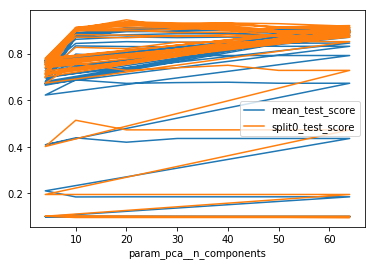

In [78]:
results.plot.line(x='param_pca__n_components', y=['mean_test_score', 'split0_test_score'])
#plt.tight_layout()
#plt.show()

In [79]:
results['param_pca__n_components'].values

array([4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20,
       30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50,
       64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10,
       20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40,
       50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4,
       10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30,
       40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64,
       4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20,
       30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50,
       64, 4, 10, 20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64, 4, 10,
       20, 30, 40, 50, 64, 4, 10, 20, 30, 40, 50, 64], dtype=object)

In [80]:
np.logspace(-4, 4, 5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

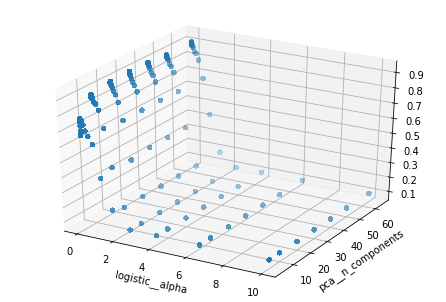

In [81]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Y=results['param_pca__n_components']
X=results['param_logistic__alpha']
Z=results['mean_test_score']
fig = plt.figure()
ax = Axes3D(fig)
ax.set_ylabel('pca__n_components')
ax.set_xlabel('logistic__alpha')
surf = ax.scatter(X, Y, Z, linewidth=0, antialiased=False)